In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('ex1data2.csv',header=None)
df=df.rename(columns={0:'A',1:'B',2:'C'})
df.head()

,A,B,C
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [50]:
X=df.iloc[:, :-1]
Y=df.iloc[:,-1]

In [51]:
X.head()

,A,B
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [52]:
Y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: C, dtype: int64

In [53]:
bc=[ 1 for i in range(X.shape[0])]                            #adding bias column to X
X.insert(0,'bc',bc)

In [54]:
X.head()

,bc,A,B
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [55]:
for c in (X.iloc[:,1:].columns):                     # performing feature scaling for X
    X[c]=X[c]/(X[c].max()-X[c].min())

In [56]:
X.head()

,bc,A,B
0,1,0.580254,0.75
1,1,0.441258,0.75
2,1,0.661886,0.75
3,1,0.390513,0.50
4,1,0.827358,1.00


In [57]:
X = np.c_[X]
X[:,0]
X

array([[1.        , 0.58025372, 0.75      ],
       [1.        , 0.44125758, 0.75      ],
       [1.        , 0.66188638, 0.75      ],
       [1.        , 0.39051296, 0.5       ],
       [1.        , 0.82735797, 1.        ],
       [1.        , 0.54743519, 1.        ],
       [1.        , 0.42305571, 0.75      ],
       [1.        , 0.39354661, 0.75      ],
       [1.        , 0.38058467, 0.75      ],
       [1.        , 0.41202427, 0.75      ],
       [1.        , 0.53502482, 1.        ],
       [1.        , 0.55157198, 0.75      ],
       [1.        , 0.52123552, 0.75      ],
       [1.        , 1.23496966, 1.25      ],
       [1.        , 0.34969664, 0.75      ],
       [1.        , 0.63430778, 1.        ],
       [1.        , 0.36403751, 0.5       ],
       [1.        , 0.34087148, 0.75      ],
       [1.        , 0.71952565, 1.        ],
       [1.        , 0.83590734, 1.        ],
       [1.        , 0.48731384, 0.75      ],
       [1.        , 0.52068395, 0.5       ],
       [1.

In [58]:
Y=Y/(Y.max()-Y.min())

In [59]:
Y = np.c_[Y]

In [60]:
theta=np.zeros((1,X.shape[1]))

In [61]:
J_hist=[]               # List of Cost
theta_hist=[]          # list of theta values
m=X.shape[0]            #total rows
for i in range(8000):
    theta_hist.append(theta.tolist())
    #print(theta.tolist())
    h= theta*X                      # calculation of hyposthesis
    h=np.sum(h,axis=1)             
    J=(1/2*m)*np.sum((h-Y)**2)     # cost calculation
    #print(J)                     
    J_hist.append(J)              
    for c in range(X.shape[1]):
        theta[0][c]=theta[0][c]-0.018*(np.sum((h-Y)*X[:,c])/m)              #gradient descent (update theta)

In [62]:
theta_hist

[[[0.0, 0.0, 0.0]],
 [[0.543375679245283, 0.2998128285713843, 0.4306541287635487]],
 [[0.1983526856504278, 0.08919315610853759, 0.13850309717308862]],
 [[0.4394213045169205, 0.21598008903794969, 0.3236878172571479]],
 [[0.29319680332979003, 0.1204515739103761, 0.19392142209318486]],
 [[0.40227823407257457, 0.1720986964187555, 0.2722341962062974]],
 [[0.3424597637141648, 0.1269855451112918, 0.21333947212260762]],
 [[0.3937949431911437, 0.14613534168020315, 0.24517703190578147]],
 [[0.37141456743243334, 0.12323473133671982, 0.2172667724437561]],
 [[0.3973715657639841, 0.12845512474624002, 0.2289455920247535]],
 [[0.39110147407464385, 0.11546049987549584, 0.21463181438647372]],
 [[0.4057990125342076, 0.11482851760118024, 0.21761617168281358]],
 [[0.40635642410432726, 0.10636202347498394, 0.20931650849446126]],
 [[0.4159592538464534, 0.10338361304274439, 0.20859822232628966]],
 [[0.4193099889789914, 0.09708789365285073, 0.20300392386395152]],
 [[0.4265157502797372, 0.09327777028537691, 0.2

In [63]:
J_hist

[24243.18725189296,
 12328.810244367358,
 7126.996176582545,
 4851.129355972949,
 3850.9369768963697,
 3407.1846885843815,
 3206.394537249438,
 3111.9224561552605,
 3064.1917770409814,
 3037.214042000811,
 3019.6403064388955,
 3006.503044808565,
 2995.617117623594,
 2986.0112022572207,
 2977.24412204561,
 2969.1068262044755,
 2961.492443969706,
 2954.339590967357,
 2947.60760333208,
 2941.2656897801903,
 2935.2881525970547,
 2929.6522566547906,
 2924.3372554170533,
 2919.323923940594,
 2914.594315432374,
 2910.131617676659,
 2905.920055279168,
 2901.9448140310546,
 2898.191976933338,
 2894.648467199723,
 2891.3019960810834,
 2888.141014462619,
 2885.1546676741136,
 2882.332753173322,
 2879.6656808640855,
 2877.1444358605922,
 2874.760543536094,
 2872.506036710989,
 2870.3734248469987,
 2868.3556651235717,
 2866.44613528086,
 2864.638608120873,
 2862.927227565217,
 2861.3064861740827,
 2859.771204036996,
 2858.316508951379,
 2856.9378178100587,
 2855.6308191237717,
 2854.3914566091685,


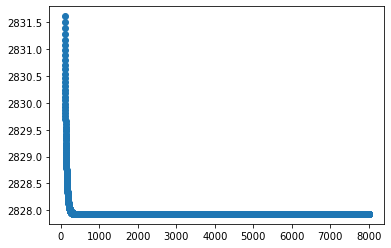

In [66]:
plt.figure()                                                   # for small dataset use normal equation 
plt.scatter(x=list(range(100, 8000)), y=J_hist[100:8000])    #instead of gradient descent
plt.show()

In [67]:
def linear_Regg(X,Y,alpha,epoch):
    theta=np.zeros((1,X.shape[1]))
    J_hist=[]
    theta_hist=[]
    m=X.shape[0]
    for i in range(epoch):
        theta_hist.append(theta.tolist())
        #print(theta.tolist())
        h= theta*X
        h=np.sum(h,axis=1)
        J=(1/(2*m))*np.sum((h-Y)**2)
        #print(J)
        J_hist.append(J)
        for c in range(X.shape[1]):
            theta[0][c]=theta[0][c]-alpha*(np.sum((h-Y)*X[:,c])/m)
    return theta_hist, J_hist

In [75]:
theta_his, J_his = linear_Regg(X,Y,0.018,500)

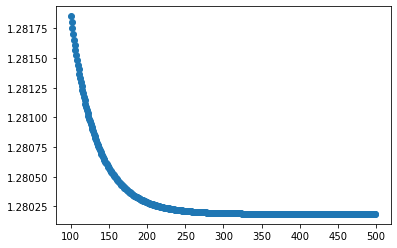

In [76]:
plt.figure()
plt.scatter(x=list(range(100, 500)), y=J_his[100:500])
plt.show()

In [ ]:
#alpha of 0.018 seems to work great for model training